In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fire-dataset/sf-fire-incidents.csv
/kaggle/input/fire-dataset/sf-fire-calls.csv


# Question 1

## What where all the different types of fire call in 2018?

In [2]:
import pandas as pd 
import numpy as np 
df = pd.read_csv('/kaggle/input/fire-dataset/sf-fire-calls.csv')
df_2 = pd.read_csv('/kaggle/input/fire-dataset/sf-fire-incidents.csv')

/tmp/ipykernel_42/2263300563.py:3: DtypeWarning: Columns (12,13,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/fire-dataset/sf-fire-calls.csv')
/tmp/ipykernel_42/2263300563.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv('/kaggle/input/fire-dataset/sf-fire-incidents.csv')


In [3]:
df['CallDate']

0         01/11/2002
1         01/11/2002
2         01/11/2002
3         01/11/2002
4         01/11/2002
             ...    
175291    10/30/2018
175292    10/30/2018
175293    10/30/2018
175294    10/30/2018
175295    10/30/2018
Name: CallDate, Length: 175296, dtype: object

In [4]:
df['CallDate'] = pd.to_datetime(df['CallDate'])
df_2018 = df[df['CallDate'].dt.year == 2018]
df_calltype_2018 = pd.DataFrame(df_2018['CallType'].unique(),columns = ['Type of fire call in 2018'])


In [5]:
df_calltype_2018

,Type of fire call in 2018
0,Structure Fire
1,HazMat
2,Alarms
3,Medical Incident
4,Electrical Hazard
5,Traffic Collision
6,Fuel Spill
7,Other
8,Elevator / Escalator Rescue
9,Outside Fire


## What month within the year 2018 saw the highest number of fire call?

In [18]:
df['CallDate'] = pd.to_datetime(df['CallDate'])
df_2018 = df[df['CallDate'].dt.year == 2018]
monthly_fire_calls = df_2018.groupby(df_2018['CallDate'].dt.month).size()
max_fire_calls_month = monthly_fire_calls.idxmax()
max_fire_calls_count = monthly_fire_calls.max()
print(f"Month with the most fire calls: {max_fire_calls_month}, Number of calls: {max_fire_calls_count}")


Month with the most fire calls: 10, Number of calls: 1068


## Which neighbourhood in SF generated the most fire calls in 2018?

In [5]:
df['CallDate'] = pd.to_datetime(df['CallDate'])
df_2018 = df[df['CallDate'].dt.year == 2018]
neighborhood_fire_calls = df_2018.groupby('Neighborhood').size().sort_values(ascending=False)
most_fire_calls_neighborhood = neighborhood_fire_calls.idxmax()
most_fire_calls_count = neighborhood_fire_calls.max()
print(f"The neighborhood with the most fire calls in 2018: {most_fire_calls_neighborhood}, with {most_fire_calls_count} calls.")


The neighborhood with the most fire calls in 2018: Tenderloin, with 1393 calls.


## Which neighbourhood had the worst response time to fire calls in 2018?

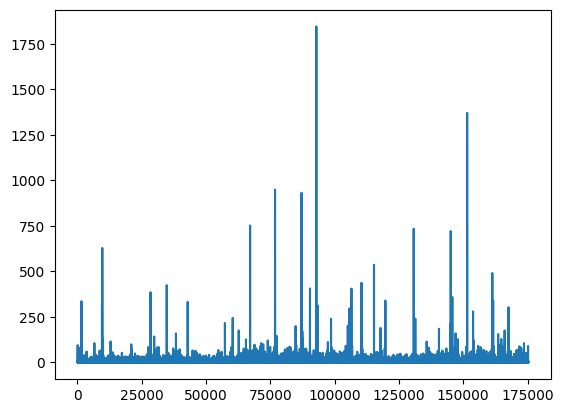

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.plot(df['Delay'])


### Assuming the column `Delay` is response time (lack of documentation at the moment)
### Also, assuming the units of the column to be minutes
### As seen in the plot above, there are a few outliers (mean of the respose time is around 4 minutes)

### Now, we'll remove outliers before proceeding further with the calculation

In [7]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Delay'].quantile(0.25)
Q3 = df['Delay'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the outliers
filtered_df = df[(df['Delay'] >= lower_bound) & (df['Delay'] <= upper_bound)]

print(filtered_df)

        CallNumber UnitID  IncidentNumber          CallType   CallDate  \
0         20110016    T13         2003235    Structure Fire 2002-01-11   
1         20110022    M17         2003241  Medical Incident 2002-01-11   
2         20110023    M41         2003242  Medical Incident 2002-01-11   
3         20110032    E11         2003250      Vehicle Fire 2002-01-11   
4         20110043    B04         2003259            Alarms 2002-01-11   
...            ...    ...             ...               ...        ...   
175291   183034235    T08        18127270    Structure Fire 2018-10-30   
175292   183034238     86        18127271  Medical Incident 2018-10-30   
175293   183034268    E08        18127272  Medical Incident 2018-10-30   
175294   183034485   KM03        18127291  Medical Incident 2018-10-30   
175295   183034507    E19        18127292  Medical Incident 2018-10-30   

         WatchDate        CallFinalDisposition           AvailableDtTm  \
0       01/10/2002                   

In [58]:
filtered_df.Delay.max()

7.3

In [8]:
filtered_df_2018 = df[df['CallDate'].dt.year == 2018]
worst_responsetime = filtered_df_2018.groupby('Neighborhood')['Delay'].mean().sort_values(ascending=False)
worst_fire_calls = worst_responsetime.max()
worst_fire_calls_neighborhood = worst_responsetime.idxmax()
print(f"The worst response time to fire calls in 2018:{worst_fire_calls} in Neighborhood: {worst_fire_calls_neighborhood} ")

The worst response time to fire calls in 2018:6.190314097905759 in Neighborhood: Chinatown 


## Which week in the year 2018 had the most fire calls?

In [20]:
df['CallDate'] = pd.to_datetime(df['CallDate'])
df_2018 = df[df['CallDate'].dt.year == 2018]
weekly_fire_calls = df_2018.groupby(df_2018['CallDate'].dt.isocalendar().week).size()
max_fire_calls_week = weekly_fire_calls.idxmax()
max_fire_calls_count = weekly_fire_calls.max()
print(f"Week with the most fire calls: Week {max_fire_calls_week}, Number of calls: {max_fire_calls_count}")

Week with the most fire calls: Week 22, Number of calls: 259


## Is there a correlation between neighbourhood zipcode and number of fire calls?

In [11]:
df_2.head()

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,16000003,0,Precita Av/florida Street,01/01/2016,160010015,01/01/2016 12:02:57 AM,01/01/2016 12:08:05 AM,01/01/2016 12:12:51 AM,San Francisco,94110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,Bernal Heights,"(37.7475540000296, -122.409572)"
1,16000004,0,1620 Eucalyptus Drive,01/01/2016,160010018,01/01/2016 12:03:02 AM,01/01/2016 12:09:32 AM,01/01/2016 12:15:04 AM,San Francisco,94132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,Sunset/Parkside,"(37.7310980000296, -122.488151)"
2,16000023,0,171 2nd Street,01/01/2016,160010157,01/01/2016 12:35:02 AM,01/01/2016 12:40:17 AM,01/01/2016 12:53:24 AM,San Francisco,94105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Financial District/South Beach,"(37.7871460000297, -122.398598)"
3,16000034,0,535 Wisconsin Street,01/01/2016,160010210,01/01/2016 12:45:36 AM,01/01/2016 12:50:00 AM,01/01/2016 01:00:47 AM,San Francisco,94107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Potrero Hill,"(37.7606670000296, -122.399175)"
4,16000051,0,El Camino Del Mar/seal Rock Drive,01/01/2016,160010302,01/01/2016 01:01:59 AM,01/01/2016 01:12:01 AM,01/01/2016 01:20:16 AM,San Francisco,94121.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Outer Richmond,"(37.7805136379969, -122.510171681643)"


In [25]:
fire_calls_by_zip = df_2.groupby('Zipcode').size()
fire_calls_by_zip 

Zipcode
94102.0    2986
94103.0    3260
94104.0     365
94105.0    1063
94107.0    1702
94108.0     912
94109.0    2537
94110.0    2312
94111.0     664
94112.0    1399
94114.0    1004
94115.0    1407
94116.0     667
94117.0    1049
94118.0     901
94121.0     831
94122.0    1190
94123.0     919
94124.0    1606
94127.0     321
94129.0     240
94130.0     177
94131.0     694
94132.0     938
94133.0    1186
94134.0     767
94158.0     322
dtype: int64

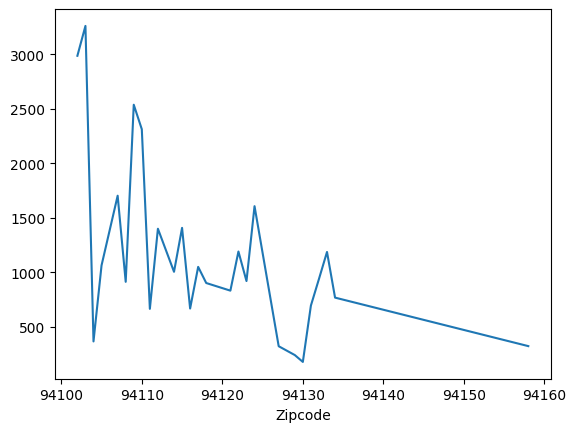

In [31]:
import matplotlib.pyplot as plt
fire_calls_by_zip = df_2.groupby('Zipcode')['Call Number'].count()
fire_calls_by_zip.plot()
plt.show()


## How can we use parquet files or SQL tables to store this data and read it back?